# 作業八

## 題目一 (50%)

### 題目敘述

這題使用OkCupid的資料集（[資料來源](https://www.kaggle.com/andrewmvd/okcupid-profiles)）。OkCupid是一個美國的交友網站，使用者可以在上面填寫個人資料，並且透過填寫的資料找到適合的對象。
  - age: 年齡
  - status: 婚姻狀況
  - sex: 性別
  - orientation: 性傾向
  - body_type: 體型
  - diet: 飲食習慣
  - drinks: 飲酒習慣
  - drugs: 藥物使用習慣
  - education: 教育程度
  - ethnicity: 種族
  - height: 身高
  - income: 收入
  - job: 職業
  - last_online: 最後上線時間
  - location: 地點
  - offspring: 子女
  - pets: 寵物
  - religion: 宗教
  - sign: 星座
  - smokes: 抽菸習慣
  - speaks: 語言

In [1]:
import csv
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime

In [2]:
# 1. 準備
sns.set(rc={'figure.figsize':(16,9)})
ok=pd.read_csv('./okcupid.csv', encoding='utf-8')

In [3]:
# 2. 使用者性別與種族分析
eth=ok[['sex','ethnicity']]
eth=eth.fillna('Other')
eth['ethnicity'] = eth['ethnicity'].str.split(', ')
eth = eth.explode('ethnicity').reset_index(drop=True)

<AxesSubplot:xlabel='count', ylabel='ethnicity'>

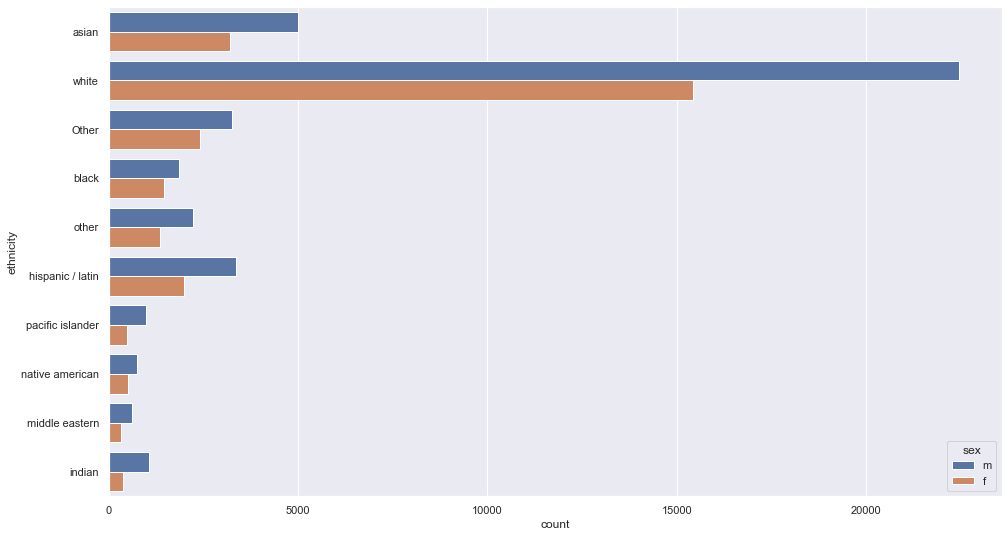

In [4]:
sns.countplot(y='ethnicity', hue='sex', data=eth)

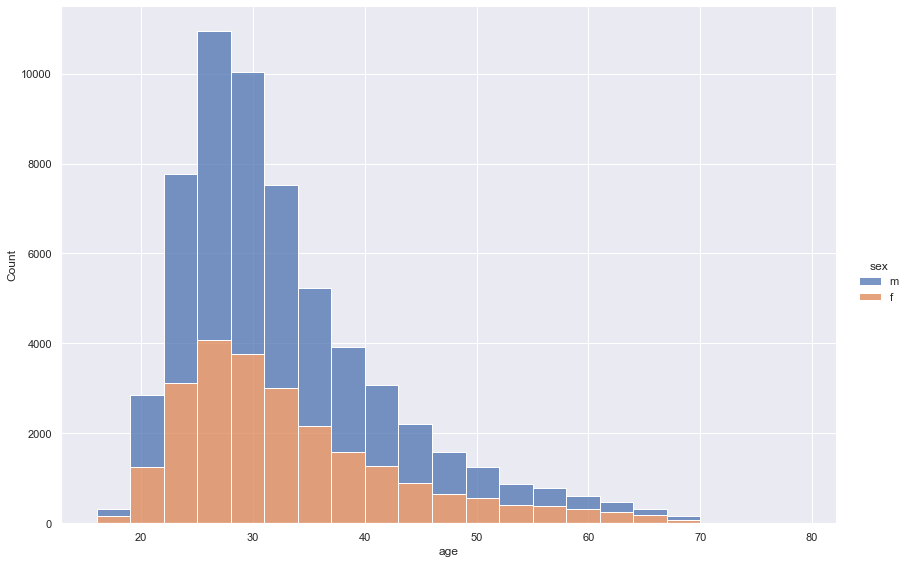

In [5]:
# 3. 使用者性別與年齡分析
sns.displot(x='age', data=ok, bins=np.arange(16, 80, 3), hue='sex', multiple='stack', height=8, aspect=1.5)

In [6]:
# 4. 繪製圓餅圖
def bake_pie(col):
    data=ok[col].value_counts()
    plt.pie(data, labels=data.index+' ('+str(data.sum())+')', autopct="%0.0f%%")
    return

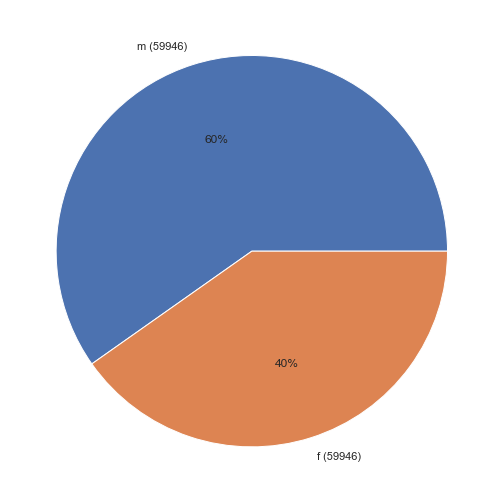

In [7]:
bake_pie('sex')

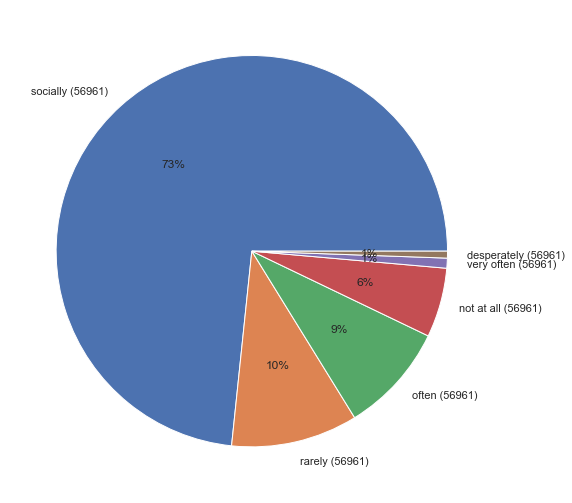

In [8]:
bake_pie('drinks')

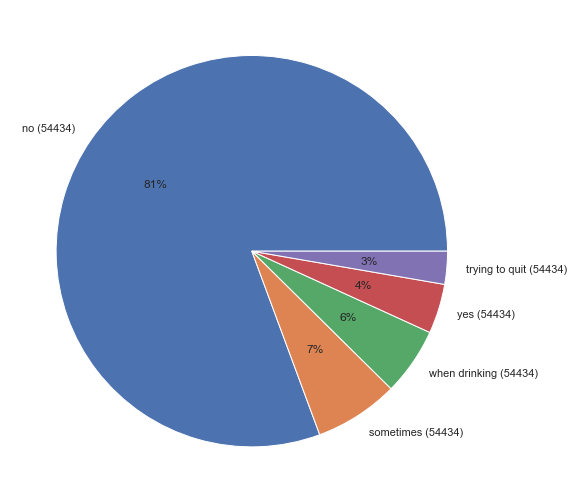

In [9]:
bake_pie('smokes')

## 題目二 (50%)

### 題目敘述

這題會使用一份天氣資料集，記錄自1979/01/01至2020/12/31之間倫敦的天氣狀況（[資料來源](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data/data) ）。這個資料集中包含以下10個欄位：

  - date: 測量日期（整數）
  - cloud_cover: 雲覆蓋量，單位為oktas（浮點數）
  - sunshine: 日照時數（浮點數）
  - global_radiation: 全球輻射量，單位為每平方米瓦特（W/m²）（浮點數）
  - max_temp: 最高溫度，單位為攝氏度（°C）（浮點數）
  - mean_temp: 平均溫度，單位為攝氏度（°C）（浮點數）
  - min_temp: 最低溫度，單位為攝氏度（°C）（浮點數）
  - precipitation: 降水量，單位為公釐（mm）（浮點數）
  - pressure: 氣壓，單位為帕斯卡（Pa）（浮點數）
  - snow_depth: 雪深，單位為公分（cm）（浮點數）

In [10]:
# 1. 讀取資料
df=pd.read_csv('./london_weather.csv', encoding='utf-8')

In [11]:
# 2. 前處理
# 補0
df=df.fillna(0)
df["date"]=pd.to_datetime(df["date"], format="%Y%m%d")
# 新增month和year
df["month"]=df["date"].dt.month
df["year"]=df["date"].dt.year
# 格式轉換
df["date"]=df["date"].dt.date
# 列印df
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,month,year
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1,1979
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1,1979
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1,1979
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1,1979
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1,1979


In [12]:
# 3. 溫度趨勢分析
# 算年平均
df["date"]=pd.to_datetime(df["date"], format="%Y-%m-%d")
df.set_index('date', inplace=True)
resampled_df = df.resample('1Y').mean()

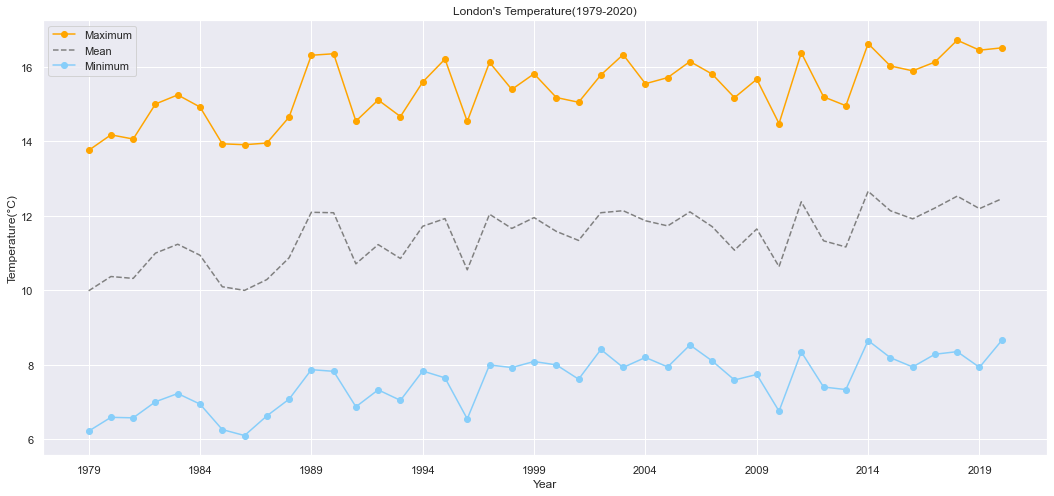

In [13]:
# 時間序列折線圖
plt.figure(figsize=(18, 8))

plt.plot(resampled_df["year"], resampled_df["max_temp"], linestyle='-', color='orange', label="Maximum", marker='o')
plt.plot(resampled_df["year"], resampled_df["mean_temp"], linestyle='--', color='grey', label="Mean")
plt.plot(resampled_df["year"], resampled_df["min_temp"], linestyle='-', color='lightskyblue', label="Minimum", marker='o')

plt.xticks(range(1979, 2020, 5))
plt.yticks(range(int(min(resampled_df["min_temp"])), int(max(resampled_df["max_temp"])) + 1, 2))

plt.xlabel("Year")
plt.ylabel("Temperature(°C)")
plt.title("London's Temperature(1979-2020)")
plt.legend()
plt.show()

In [14]:
pivot_df = df.resample('1M').mean()
pivot_df = pivot_df.pivot_table(values='mean_temp', index='month', columns='year')
pivot_df.index = pivot_df.index.astype(int)
pivot_df.columns = pivot_df.columns.astype(int)

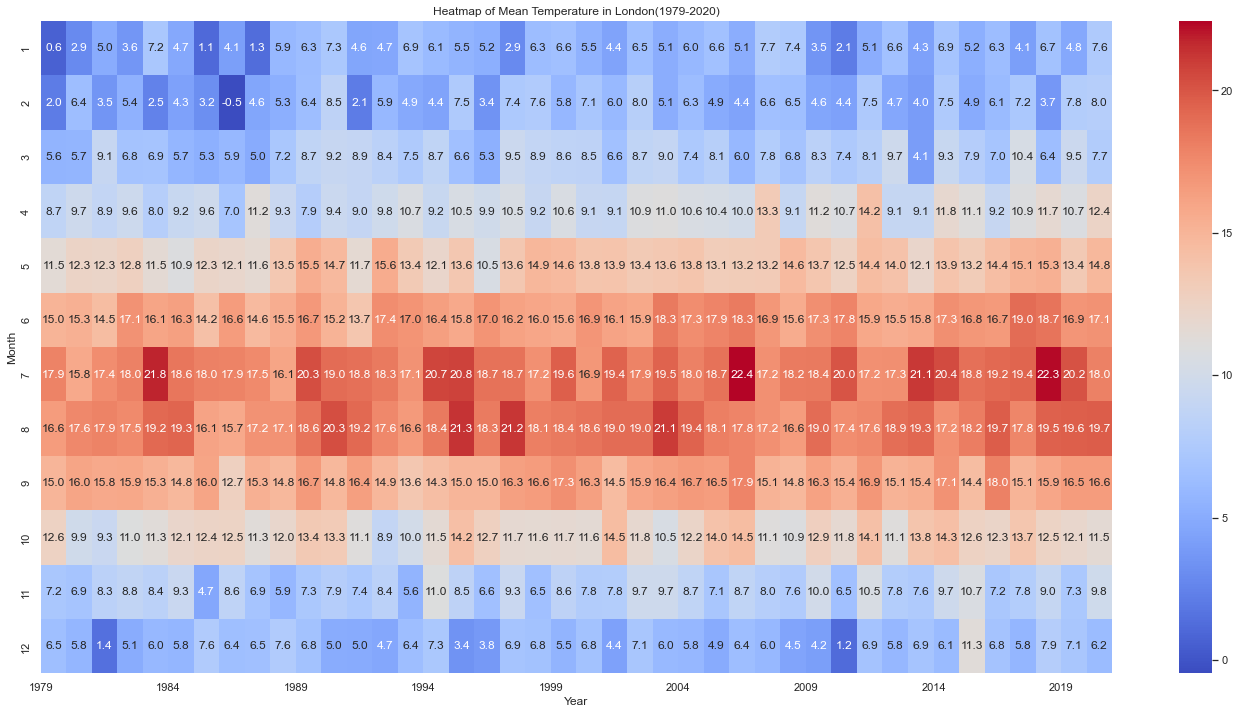

In [15]:
# 熱力圖
plt.figure(figsize=(24, 12))
ax=sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt=".1f")

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%d"))

plt.xticks(range(0, 44, 5), range(1979, 2020, 5), rotation=0)

plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Heatmap of Mean Temperature in London(1979-2020)')
plt.show()

## 加分題 (20%)

呈題目二，請自行從資料集中額外挑選**三個**變量進行視覺化分析。最後結合溫度趨勢的發現，回答你認為最適合前往倫敦旅遊的時機。

In [16]:
add_df = df.resample('1M').mean()
add_df['year'] = add_df.index.year
add_df['month'] = add_df.index.month

In [17]:
cloud_table = add_df.pivot_table(values='cloud_cover', index='month', columns='year', aggfunc='mean')

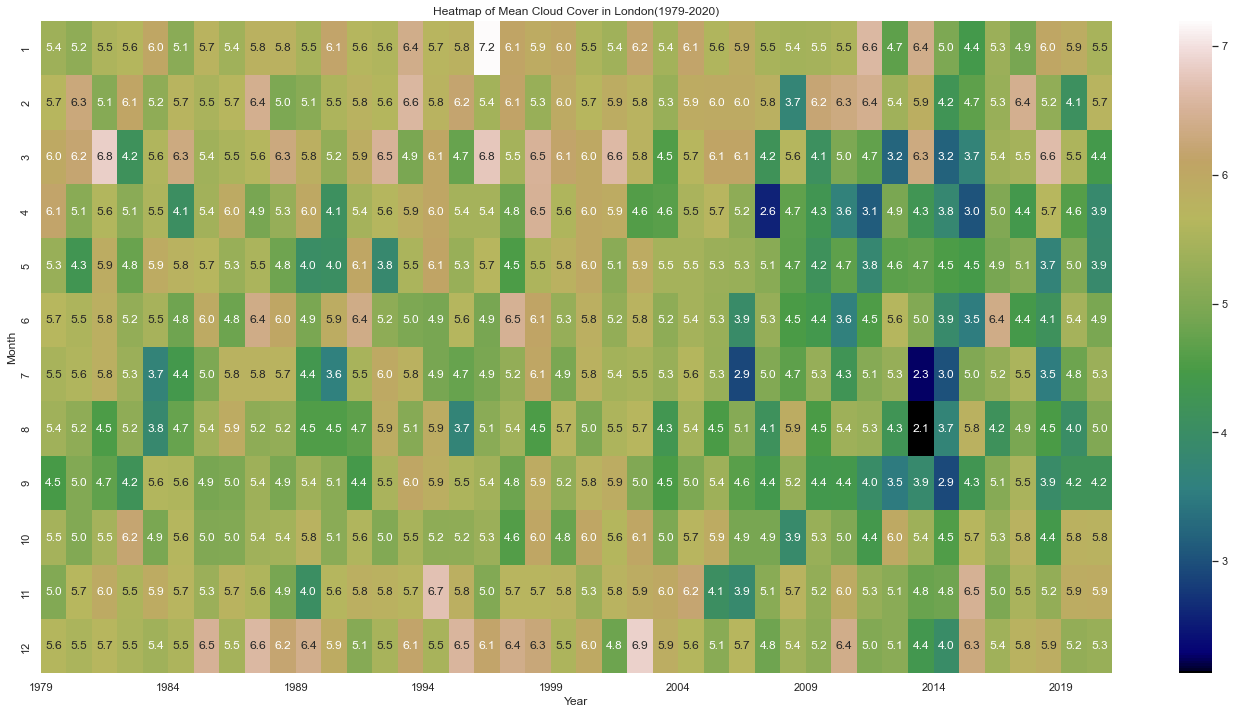

In [18]:
plt.figure(figsize=(24, 12))
ax=sns.heatmap(cloud_table, cmap='gist_earth', annot=True, fmt=".1f")

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%d"))

plt.xticks(range(0, 44, 5), range(1979, 2020, 5), rotation=0)

plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Heatmap of Mean Cloud Cover in London(1979-2020)')
plt.show()

In [19]:
cloud=cloud_table.T.mean()

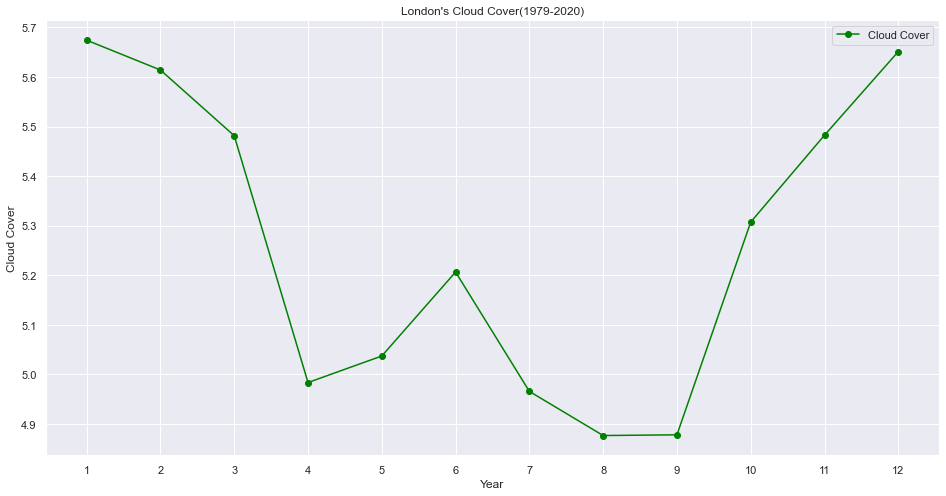

In [20]:
# 每月的雲量(cloud cover)趨勢
plt.figure(figsize=(16, 8))

plt.plot(cloud.index, cloud.values, linestyle='-', color='green', label="Cloud Cover", marker='o')

plt.xticks(range(1, 13))

plt.xlabel("Year")
plt.ylabel("Cloud Cover")
plt.title("London's Cloud Cover(1979-2020)")
plt.legend()
plt.show()

In [21]:
sunshine_table = add_df.pivot_table(values='sunshine', index='month', columns='year', aggfunc='mean')

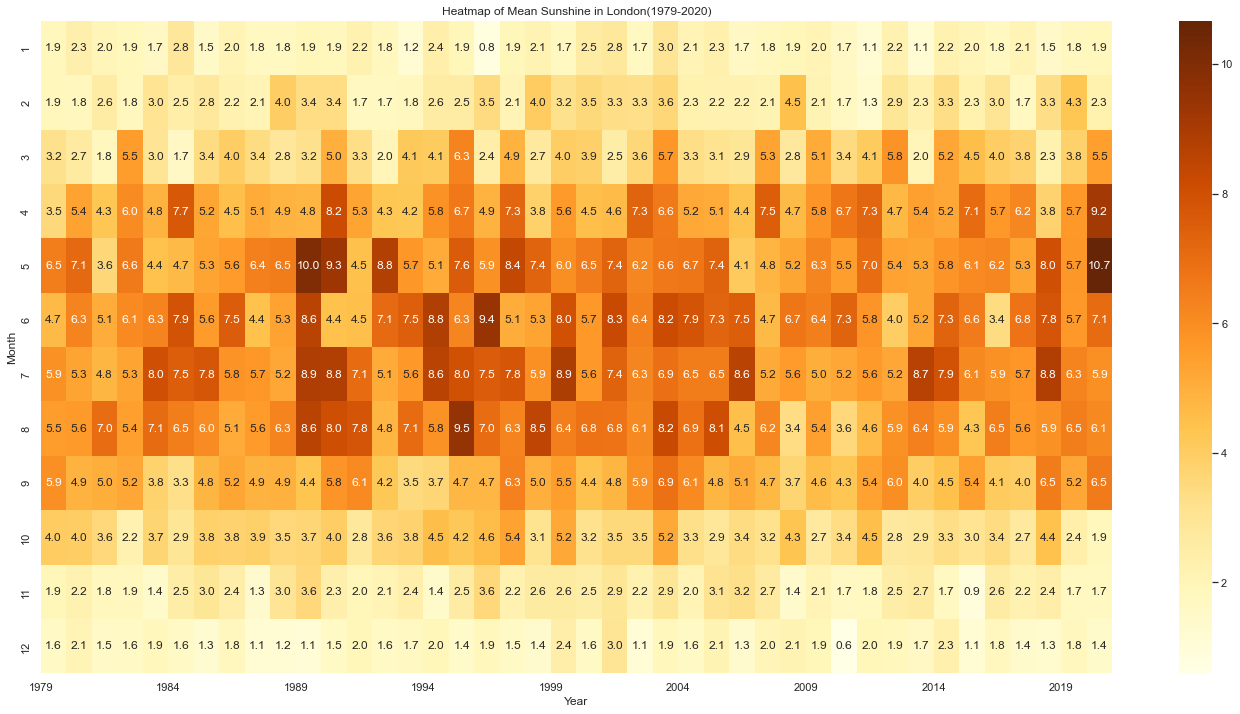

In [22]:
plt.figure(figsize=(24, 12))
ax=sns.heatmap(sunshine_table, cmap='YlOrBr', annot=True, fmt=".1f")

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%d"))

plt.xticks(range(0, 44, 5), range(1979, 2020, 5), rotation=0)

plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Heatmap of Mean Sunshine in London(1979-2020)')
plt.show()

In [23]:
sunshine=sunshine_table.T.mean()

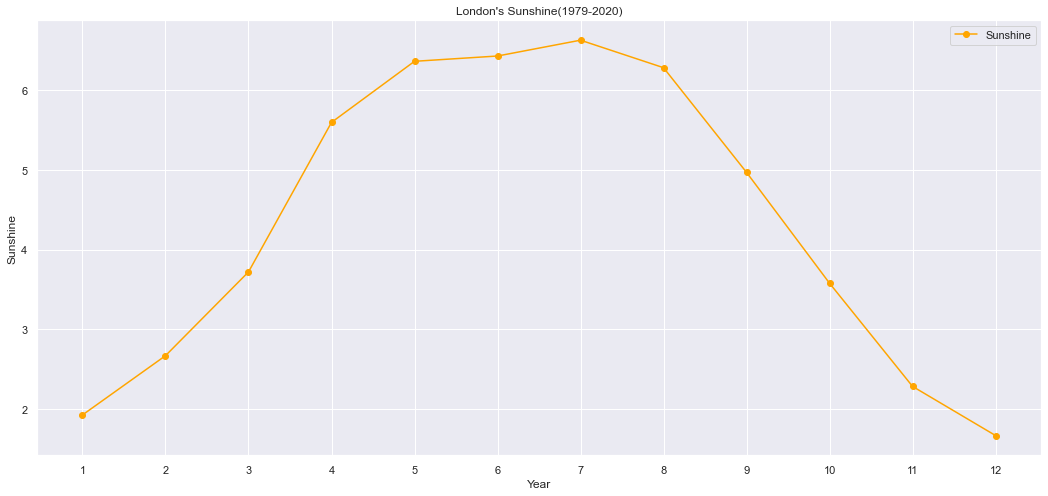

In [24]:
# 每年的陽光(sunshine)趨勢
plt.figure(figsize=(18, 8))

plt.plot(sunshine.index, sunshine.values, linestyle='-', color='orange', label="Sunshine", marker='o')

plt.xticks(range(1, 13))

plt.xlabel("Year")
plt.ylabel("Sunshine")
plt.title("London's Sunshine(1979-2020)")
plt.legend()
plt.show()

In [25]:
snow_table = add_df.pivot_table(values='snow_depth', index='month', columns='year', aggfunc='mean')
snow=snow_table.T.mean()

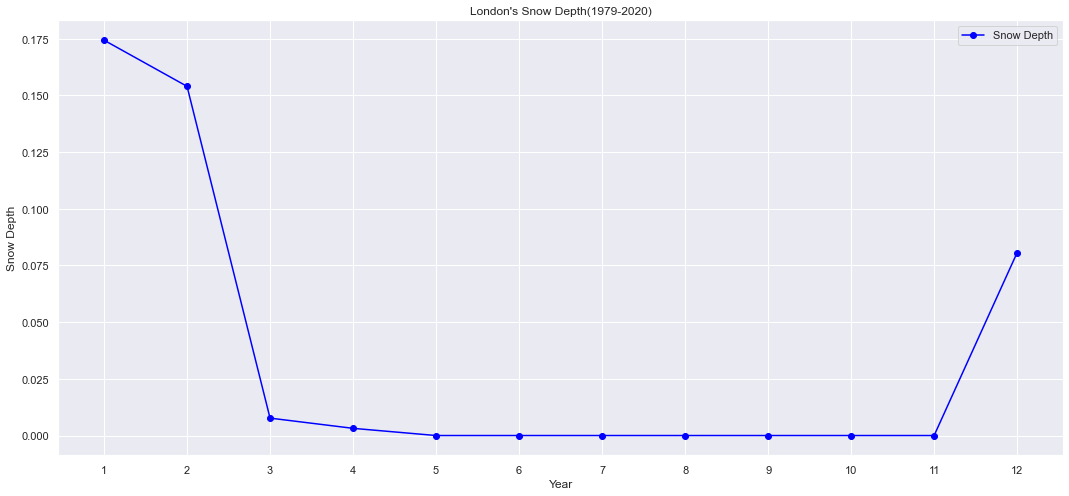

In [26]:
# 每年的雪深(snow depth)趨勢
plt.figure(figsize=(18, 8))

plt.plot(snow.index, snow.values, linestyle='-', color='blue', label="Snow Depth", marker='o')

plt.xticks(range(1, 13))

plt.xlabel("Year")
plt.ylabel("Snow Depth")
plt.title("London's Snow Depth(1979-2020)")
plt.legend()
plt.show()

### 加分題分析

For 喜歡**冷**天氣的人<br>
12-2月絕對適合你，此時倫敦積雪夠深、日照低且雲量頗多，想過一個寒冷的假期、堆堆雪人、滑滑雪再適合不過：）

For 喜歡**涼爽**天氣的人<br>
請務必選擇6月前往倫敦，此時半隻腳踏入夏季，但雲量也是這段時間中最多的，陽光正好、溫度上並不會感到炎熱，不訪這時候安排一次倫敦行吧！！

For 喜歡**熱**天氣的人<br>
倫敦的7-9月艷陽高照、萬里無雲，喜歡享受酷暑曝曬的人們絕對不要錯過！